In [14]:
# pip install python-binance tqdm pandas

# Import necessary libraries
from binance.client import Client  # Importing Binance API client
from tqdm import tqdm  # Importing tqdm for progress bars
import pandas as pd  # Importing pandas for data manipulation
import datetime  # Importing datetime for handling date and time

# Function to fetch historical kline data for specified pairs
def example_get_historical_klines(client):
    # Define pairs to fetch historical data for
    pairs = ["BTCUSDT", "BNBUSDT", "ETHUSDT", "XRPUSDT", "LTCUSDT", "ADAUSDT"]  # Adding 3 more pairs
    start_date = "1 Jan, 2024"
    end_date = "31 Dec, 2024"

    historical_data = {}

    # Loop through pairs and fetch historical data
    for pair in pairs:
        try:
            # Fetch historical data with 8-hour candlestick interval
            history_data = client.get_historical_klines(pair, Client.KLINE_INTERVAL_4HOUR, start_date, end_date)
            historical_data[pair] = history_data
        except Exception as e:
            print(f"Failed to fetch data for {pair}: {e}")

    return historical_data

# Function to convert timestamp to datetime object
def timestamp_to_datetime(timestamp):
    return datetime.datetime.fromtimestamp(timestamp / 1000)


# Main function to execute the script
def main():
    start_time = datetime.datetime.now()

    # Binance API credentials
    API_key = "IRmKve67nP3ewFyGSdSAs5RKTrHjgjJ5BLu6gCiX2y1dbhUqqohSTvMcI4Qosuid"
    API_Secret_key = "sRVPKcsjYqpLNMrtcqkIilnbEcBDBuCif7xY8833deQDVZd9HoysyUaIEhD66juJ"
    
    # Initialize Binance API client
    client = Client(API_key, API_Secret_key)
    
    # Fetch historical kline data
    historical_data = example_get_historical_klines(client)
    
    # Initialize lists to store data
    Time_spot = []
    Open = []
    High = []
    Low = []
    Close = []
    Volume = []
    Pair = []  

    # Loop through historical data and extract required information
    for pair, history_data in historical_data.items():
        if history_data:  # Check if historical data is retrieved successfully
            for num in tqdm(range(0, len(history_data))):
                Time_spot.append(timestamp_to_datetime(history_data[num][0]))
                Open.append(history_data[num][1])
                High.append(history_data[num][2])
                Low.append(history_data[num][3])
                Close.append(history_data[num][4])
                Volume.append(history_data[num][5])
                Pair.append(pair)  # Store pair name for each data point
        else:
            print(f"No data retrieved for {pair}")

    # Create DataFrame from collected data
    df = pd.DataFrame({
        'Pair': Pair,
        'Time_spot': Time_spot,
        'Open': Open,
        'High': High,
        'Low': Low,
        'Close': Close,
        'Volume': Volume,
    })
    
    # Sort DataFrame by 'Time_spot' column in descending order
    df.sort_values(by='Time_spot', ascending=False, inplace=True)
    
    # Save DataFrame to CSV file
    df.to_csv("./history_data.csv", index=False)
    
    # Print script execution time
    print("Run time : ", datetime.datetime.now() - start_time)

# Execute the main function
main()


100%|██████████| 768/768 [00:00<00:00, 240443.79it/s]

Run time :  0:00:15.088389


In [15]:
df = pd.read_csv("history_data.csv")
df.head(10)

,Pair,Time_spot,Open,High,Low,Close,Volume
0,BTCUSDT,2024-01-01 00:00:00,42283.58,42775.00,42230.08,42330.49,3948.08335
1,BTCUSDT,2024-01-01 04:00:00,42330.50,42500.00,42180.77,42492.46,2706.99880
2,BTCUSDT,2024-01-01 08:00:00,42492.46,42762.39,42452.58,42690.20,2948.80274
3,BTCUSDT,2024-01-01 12:00:00,42690.21,42847.07,42580.00,42783.05,2936.44406
4,BTCUSDT,2024-01-01 16:00:00,42783.05,43550.00,42664.42,43517.99,5686.97164
5,BTCUSDT,2024-01-01 20:00:00,43517.98,44184.10,43361.60,44179.55,8946.99844
6,BTCUSDT,2024-01-02 00:00:00,44179.55,45500.00,44148.34,45402.38,17093.28659
7,BTCUSDT,2024-01-02 04:00:00,45402.38,45643.75,45121.96,45455.53,8388.42302
8,BTCUSDT,2024-01-02 08:00:00,45455.52,45879.63,45200.00,45433.99,10027.39458
9,BTCUSDT,2024-01-02 12:00:00,45433.99,45800.00,44833.33,45184.82,13236.12915


In [6]:
df['Pair'].unique()

array(['BTCUSDT', 'BNBUSDT', 'ETHUSDT', 'XRPUSDT', 'LTCUSDT', 'ADAUSDT'],
      dtype=object)

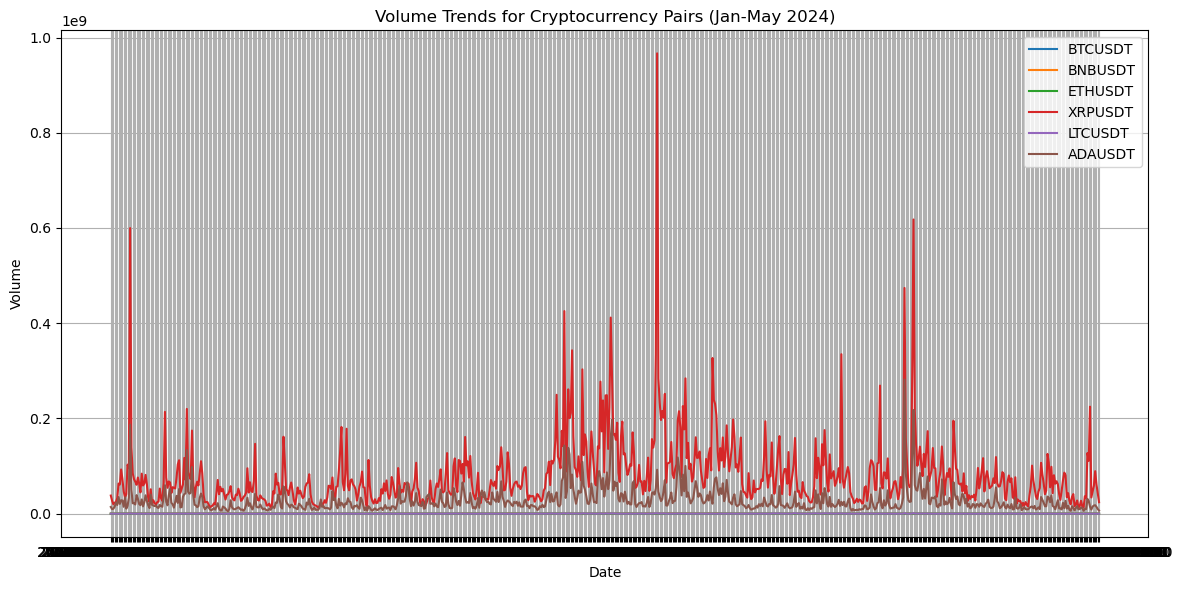

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("history_data.csv")



# Filter data for January to May of the specified year
start_date = '2024-01-01'
end_date = '2024-05-31'
filtered_df = df[(df['Time_spot'] >= start_date) & (df['Time_spot'] <= end_date)]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting volume for each pair
for pair in filtered_df['Pair'].unique():
    pair_data = filtered_df[filtered_df['Pair'] == pair]
    plt.plot(pair_data['Time_spot'], pair_data['Volume'], label=pair)

plt.title('Volume Trends for Cryptocurrency Pairs (Jan-May 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
